In [45]:
from main import *
from googleapiclient.discovery import build
import json
import pprint
from IPython.display import JSON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import config
from numerize import numerize

In [46]:
channel_id = 'UC1dI4tO13ApuSX0QeX8pHng'
channel_ids = [
    'UCOmHUn--16B90oW2L6FRR3A', # Blackpink
    'UC1dI4tO13ApuSX0QeX8pHng', # gadgetin
    'UCVvhlqBpNVoG-DUT3J0oZ-w', # tara arts
    'UCwljrkoI5jsfvAKgW3zNC7Q', # shopee
    'UCAFlBkLMn1dmdYk0kBud4RA', # tokopedia
]

youtube = build('youtube', 'v3', developerKey=config.api_key)

In [47]:
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics

,channel_name,subscribers,total_views,video_count,playlistId
0,GadgetIn,9610000,2085951930,1255,UU1dI4tO13ApuSX0QeX8pHng
1,Tara Arts Game Indonesia,1270000,421954293,1941,UUVvhlqBpNVoG-DUT3J0oZ-w
2,BLACKPINK,76600000,24887833021,407,UUOmHUn--16B90oW2L6FRR3A
3,SHOPEE Indonesia,2440000,6422460927,3688,UUwljrkoI5jsfvAKgW3zNC7Q
4,Tokopedia,2320000,1724203428,1038,UUAFlBkLMn1dmdYk0kBud4RA


In [48]:
# get response as a dataframe
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics.sort_values('channel_name', ignore_index=True, inplace=True)
channel_statistics

,channel_name,subscribers,total_views,video_count,playlistId
0,BLACKPINK,76600000,24887833021,407,UUOmHUn--16B90oW2L6FRR3A
1,GadgetIn,9610000,2085951930,1255,UU1dI4tO13ApuSX0QeX8pHng
2,SHOPEE Indonesia,2440000,6422460927,3688,UUwljrkoI5jsfvAKgW3zNC7Q
3,Tara Arts Game Indonesia,1270000,421954293,1941,UUVvhlqBpNVoG-DUT3J0oZ-w
4,Tokopedia,2320000,1724203428,1038,UUAFlBkLMn1dmdYk0kBud4RA


In [49]:
# change datatypes
channel_statistics['subscribers'] = pd.to_numeric(channel_statistics['subscribers'])
channel_statistics['total_views'] = pd.to_numeric(channel_statistics['total_views'])
channel_statistics['video_count'] = pd.to_numeric(channel_statistics['video_count'])
channel_statistics.dtypes

channel_name    object
subscribers      int64
total_views      int64
video_count      int64
playlistId      object
dtype: object

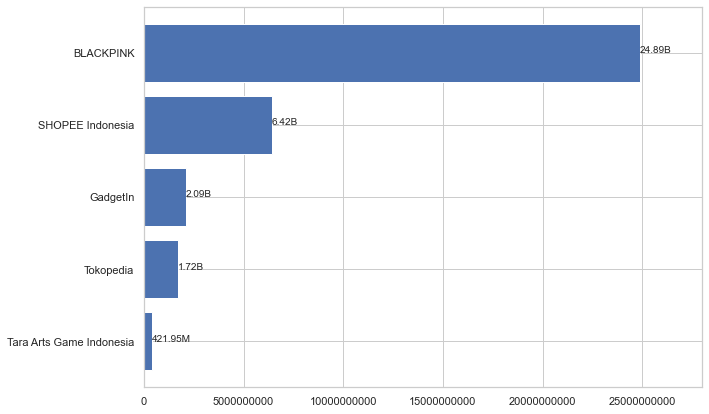

In [56]:
plot_channel_views = channel_statistics.sort_values('total_views')

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(plot_channel_views['channel_name'], plot_channel_views['total_views'])

# get rid of scientific expression for x axis
plt.ticklabel_format(axis="x", style="plain")

for index, value in enumerate(plot_channel_views['total_views']):
    plt.text(value, index,
             str(numerize.numerize(value))) # set the values to compact number
plt.xlim([0, 28000000000])

plt.show();


In [51]:
# get_playlist for video_ids
get_playlist_ids = get_playlist(youtube, channel_statistics)[0] # blackpink

video_ids1 = get_video_ids(youtube, get_playlist_ids)
len(video_ids1)

407

In [52]:
# get only 5 video ids
five_video_id = video_ids1[0:5]
get_video_details(youtube, five_video_id)

,video_id,title,description,tags,published_at,thumbnails,view_count,like_count,comment_count,duration,definition,caption
0,h86_wjTQ3-U,#PinkVenomChallenge Coming Soon Only on YouTub...,See you soon #BLINKs 🖤💖 #PinkVenomChallenge\n\...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-16T10:00:02Z,https://i.ytimg.com/vi/h86_wjTQ3-U/hqdefault.jpg,529498,180236,6874,PT16S,hd,false
1,6eCCRvCWez8,BLACKPINK - ‘Pink Venom’ Concept Teaser,#BLACKPINK #블랙핑크 #PreReleaseSingle #PinkVenom ...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-14T15:00:03Z,https://i.ytimg.com/vi/6eCCRvCWez8/hqdefault.jpg,8866531,1442088,85012,PT18S,hd,false
2,FQkI9RtkmrI,BLACKPINK - ‘Pink Venom’ JISOO Concept Teaser #2,#BLACKPINK #블랙핑크 #JISOO #지수 #PreReleaseSingle ...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-13T03:00:17Z,https://i.ytimg.com/vi/FQkI9RtkmrI/hqdefault.jpg,7685595,1176259,73099,PT16S,hd,false
3,9q3byegECqw,BLACKPINK - ‘Pink Venom’ JENNIE Concept Teaser #2,#BLACKPINK #블랙핑크 #JENNIE #제니 #PreReleaseSingle...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-13T03:00:04Z,https://i.ytimg.com/vi/9q3byegECqw/hqdefault.jpg,5886666,985148,58819,PT16S,hd,false
4,7C0TewNgkDM,BLACKPINK - ‘Pink Venom’ ROSÉ Concept Teaser #2,#BLACKPINK #블랙핑크 #ROSÉ #로제 #PreReleaseSingle #...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-12T15:00:31Z,https://i.ytimg.com/vi/7C0TewNgkDM/hqdefault.jpg,7607883,1208103,65193,PT16S,hd,false


In [53]:
five_video_comments_df = get_comments_in_videos(youtube, five_video_id)
five_video_comments_df

,video_id,comments
0,h86_wjTQ3-U,[Debo felicitar a YG porque está haciendo un g...
1,6eCCRvCWez8,[Esto es ARTE PURO!! Sonidos muy intrigantes y...
2,FQkI9RtkmrI,"[a era é dela<3, We love you pls come to turke..."
3,9q3byegECqw,"[Slayy, Wow, WOW jennie, JENNIE TE AMOO, Pls p..."
4,7C0TewNgkDM,"[Nnxicb1j, Skcudn, Pls pls pls come to turkey ..."


In [61]:
for _ in five_video_comments_df['comments'].iloc[0]:
    print(_)

Debo felicitar a YG porque está haciendo un gran trabajo en este comeback! Espero que así siga!
🌟🌟🌟❤️❤️❤️
BLACKPINK IS THE REVOLUTION.. 🖤💖
Que salga yaaaaa
Ok I’m waiting
Amk yorunlarda Yurt dışından biri yok sjsjsj
Imagine blackpink doing lot of dances with idols like how somi did
Aaaa nossas meninas cada dia lindas
❤
Türk bilinkler destek yağmuru gelsin Blackpink Türkiye'ye gelsin
Gösterin gücünüzü sizler Türk bilinklersiniz.
